# Import Libraries

In [248]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,QuantileTransformer,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

# Load Dataset

In [231]:
spam = pd.read_csv( "spambase_remake.csv")

# Display dataframe
print(spam.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [232]:
# information about data

spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# Data Exploration And Preprocessing

1. Checking Missing Values


In [233]:
# Check if there is missing values
missing = spam.isnull().sum()

# Printing numbers of missing values in each column
print("Missing Values")
print(missing)


Missing Values
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet         

There are no missing values in the dataset

2. Check the class distribution

In [234]:
class_counts = spam['spam'].value_counts()

# Print the class distribution
print("Class distribution:")
print(class_counts)
print(spam.shape)



Class distribution:
0    2788
1    1813
Name: spam, dtype: int64
(4601, 58)


There is  imbalance between spam and non spam data so resampling will be needed.

3. distribution of each feature

In [235]:
# Displaying distribution of each feature
print("Distribution of each feature:")
print(spam.describe())

Distribution of each feature:
       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   


4. Checking correlation between the features

Correlation between features:
                            word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                    1.000000          -0.016759       0.065627   
word_freq_address                -0.016759           1.000000      -0.033526   
word_freq_all                     0.065627          -0.033526       1.000000   
word_freq_3d                      0.013273          -0.006923      -0.020246   
word_freq_our                     0.023119          -0.023760       0.077734   
word_freq_over                    0.059674          -0.024840       0.087564   
word_freq_remove                  0.007669           0.003918       0.036677   
word_freq_internet               -0.003950          -0.016280       0.012003   
word_freq_order                   0.106263          -0.003826       0.093786   
word_freq_mail                    0.041198           0.032962       0.032075   
word_freq_receive                 0.188459          -0.006864       0.048254   
word_freq_

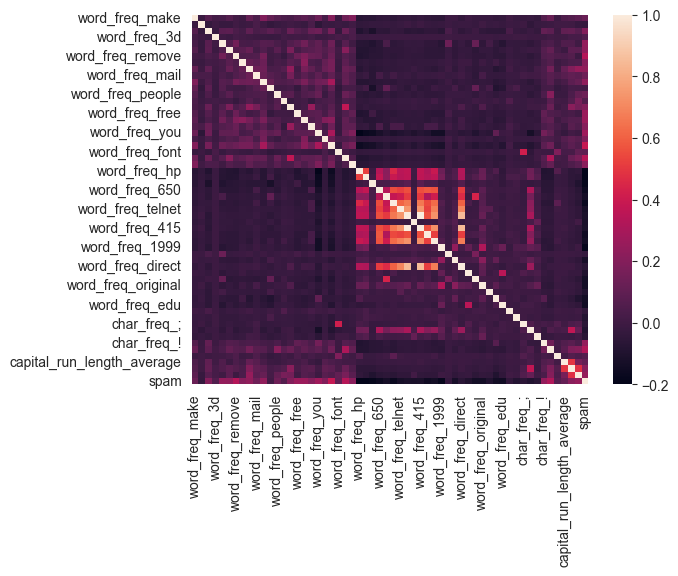

In [236]:
# the correlation matrix
correlation_matrix = spam.corr()

# Display the correlation matrix
print("Correlation between features:")
print(correlation_matrix)

#heatmap to visualize the correlation matrix between features
correlation_matrix = spam.corr()
sns.heatmap(correlation_matrix, vmin=-0.2, vmax=1)
plt.show()

C:\Users\kasun\AppData\Local\Temp\ipykernel_26024\2088957206.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(correlations.index, rotation=90)


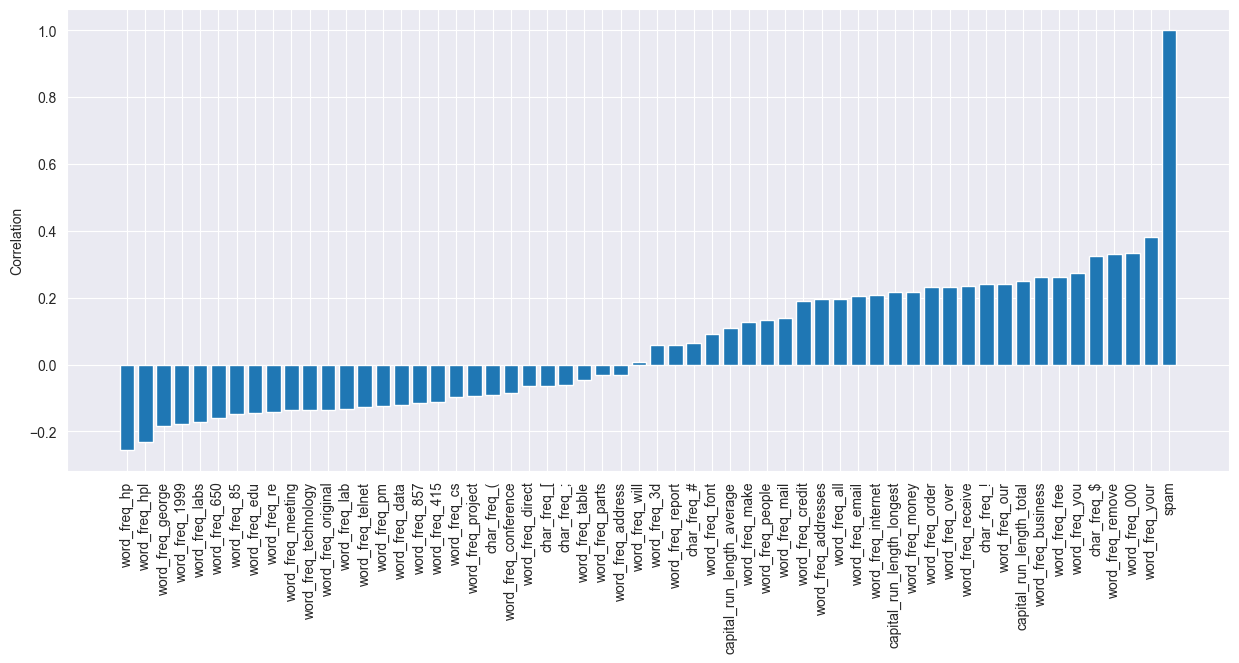

In [237]:
#correlation between feature and the target variable
correlations = spam.corr()['spam'].sort_values()

#bar chart of the correlations
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(correlations.index, correlations)
ax.set_xticklabels(correlations.index, rotation=90)
ax.set_ylabel('Correlation')
plt.show()


It seems there is good correlation between some features so trying dimensionality reduction method like PCA may improve model performance.

5. Visualize the distribution of each feature

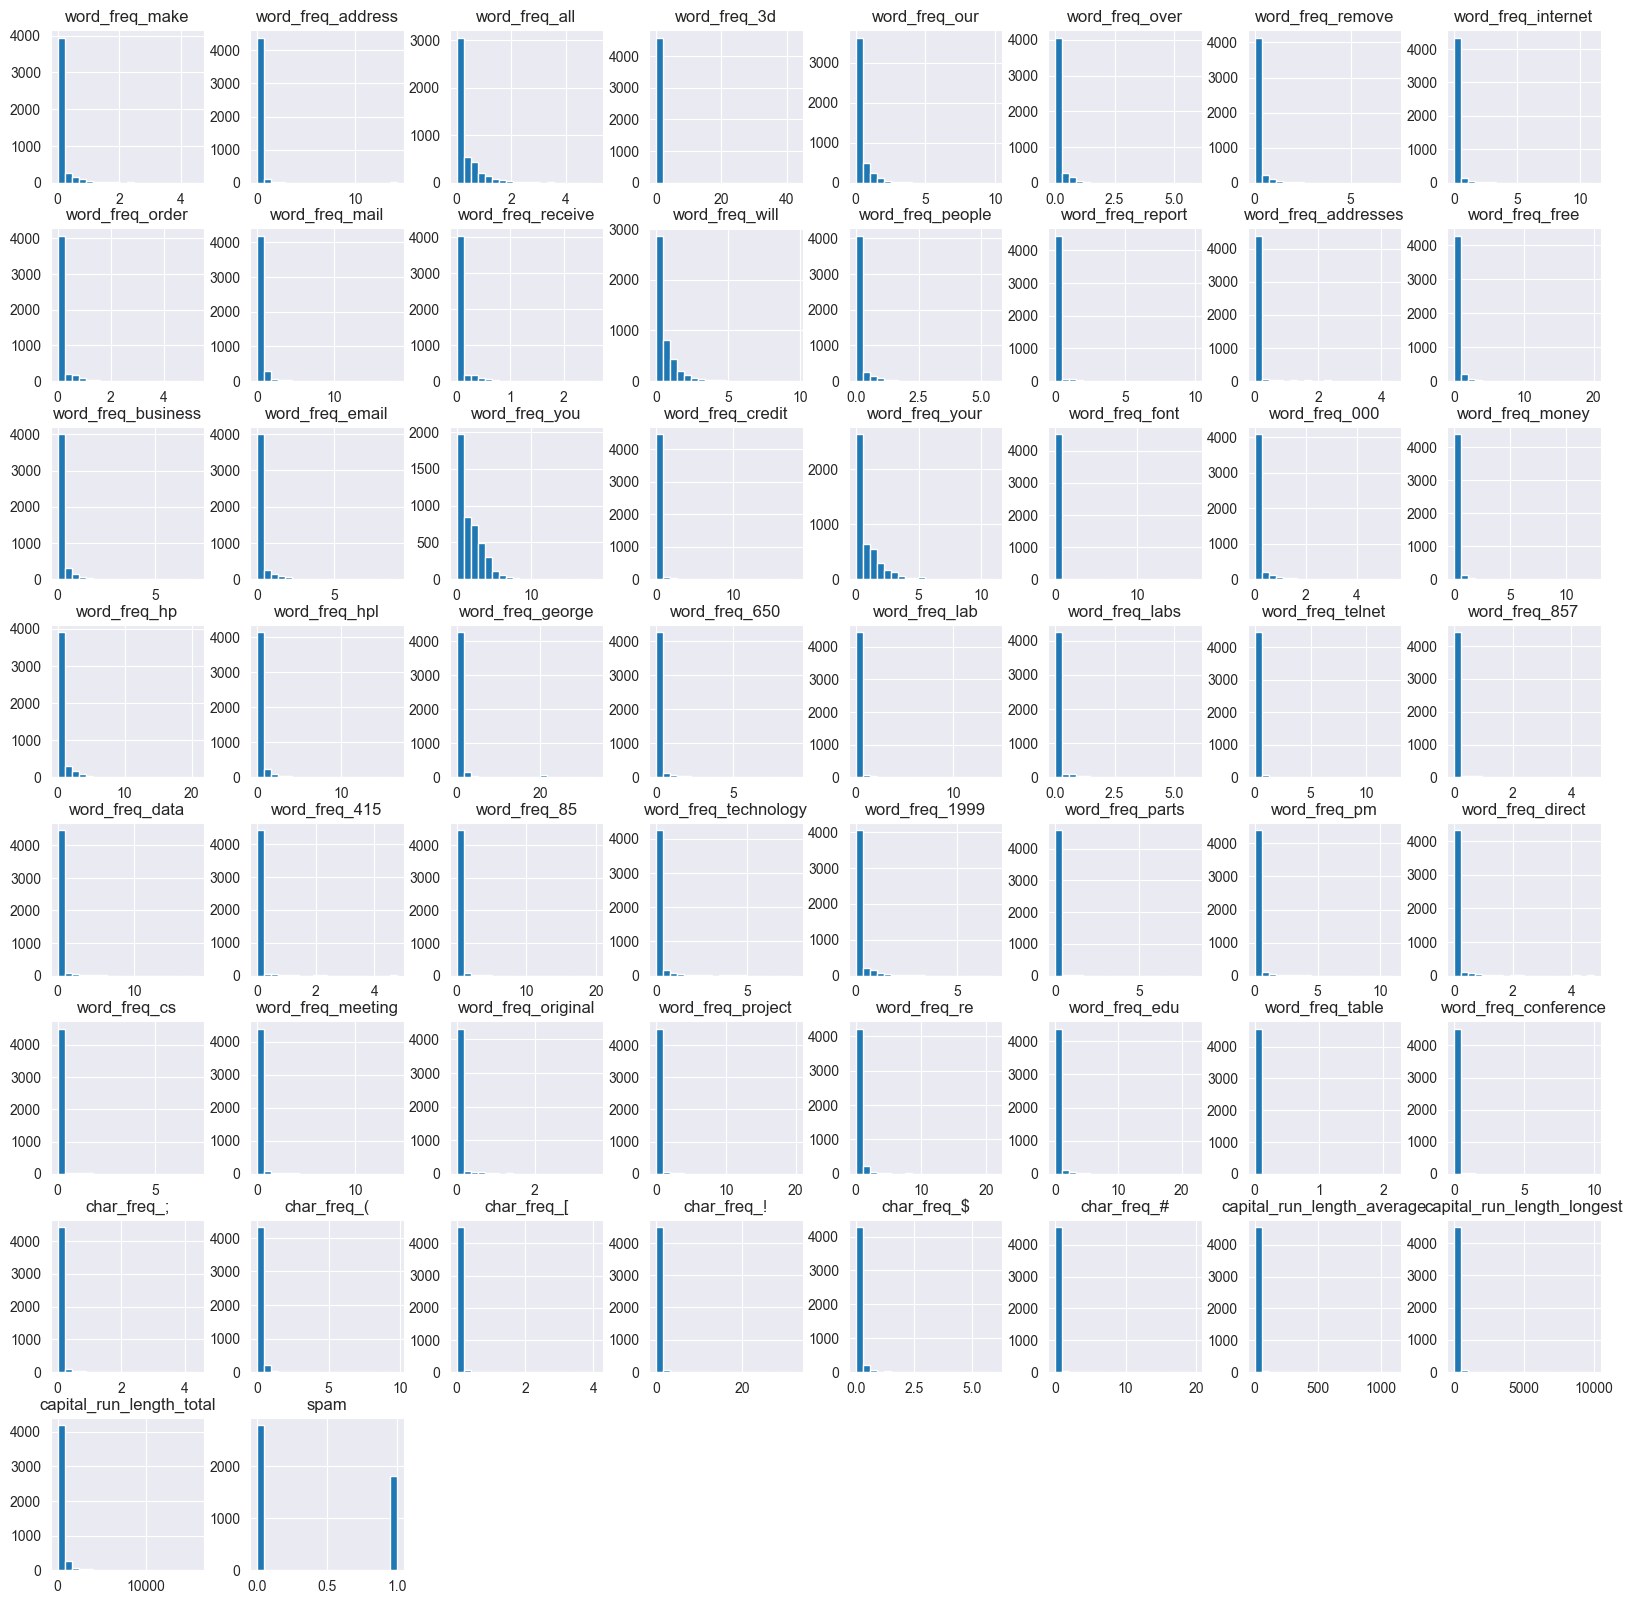

In [238]:
#histograms to visualize the distribution of each feature
spam.hist(figsize=(20,20), bins=20)
plt.show()

6. Finding Outliers

In [239]:
#Plotting box plots to identify outliers
# fig, axs = plt.subplots(ncols=5, nrows=10, figsize=(20, 100))
# axs = axs.flatten()
# for i, col in enumerate(spam.columns[:-1]):
#     axs[i].boxplot(spam[col])
#     axs[i].set_title(col)
#
# plt.show()

In [240]:
# calculate z-scores
z_scores = stats.zscore(spam)

# set a limit for z-score
zScoreLimit = 3

# find the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > zScoreLimit)

# calculate the total number of outliers
num_outliers = len(outlier_indices[0])

print("Total number of outliers = ", num_outliers)


Total number of outliers =  4134


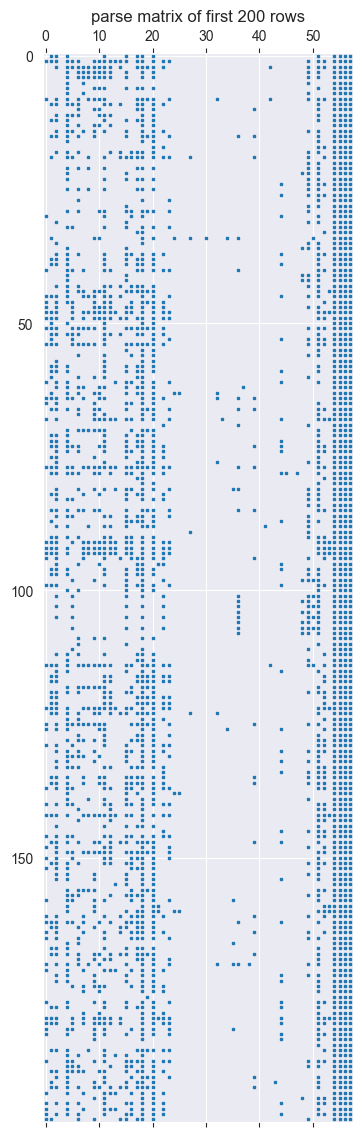

In [241]:
#Plotting Sparse Matrix
plt.figure(figsize=[4, 600])
plt.title('parse matrix of first 200 rows')
# first 200 and precision is set to 0.1
plt.spy(spam.head(200), precision=0.1, markersize=2)
plt.show()


According to the z-score method, there seem to be around 4000 outliers in the dataset. Since the majority of data points are close to zero, a small deviation from the mean can result in a large change in z-score, resulting in the identification of a large number of potential outliers. Therefore, I analyse the above distribution of each feature and box plot. In my view, there are only a few significant outliers. Furthermore, we cannot guarantee that those are true outliers because they could be special cases. As a result, I decided not to remove any outliers from the dataframe

7. Removing Duplicate Records

In [242]:
# Counting the number of duplicate rows
duplicates = spam.duplicated().sum()
print("Duplicate rows = ", duplicates)

# Drop the duplicate rows and update the dataset
spam.drop_duplicates(inplace=True)

# Verify there are no more duplicate records
assert spam.duplicated().sum() == 0
print("No more duplicate records")

Duplicate rows =  391
No more duplicate records


There were 391 duplicate rows, so those records were dropped from the dataframe.

8. Data Oversampling

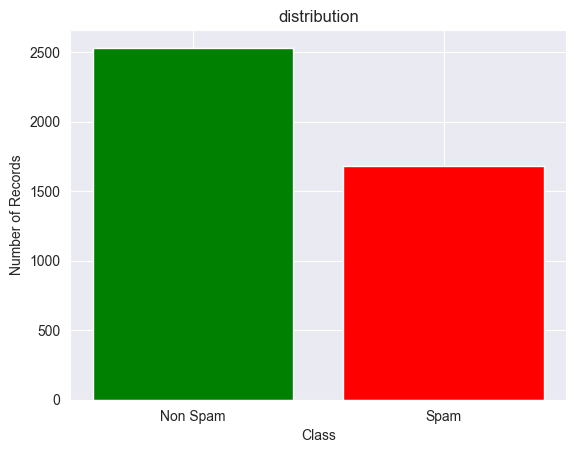

In [243]:
distribution = spam['spam'].value_counts()

# Plotting class distribution
plt.bar(distribution.index, distribution.values,color=['green', 'red'])
plt.xticks(distribution.index, ['Non Spam', 'Spam'])
plt.xlabel('Class')
plt.ylabel('Number of Records')
plt.title('distribution')
plt.show()


As the observation, there are imbalances in the data. spam data are undersampled. so we have to oversample those data. I chose SMOTE method as the oversampling method.

In [244]:
from sklearn.model_selection import train_test_split

# Applying SMOTE
columns = spam.columns
X = spam.drop(['spam'],axis=1)
Y = spam['spam']

# Splitting Data into train and test before applying the smote
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1)
sm = SMOTE(random_state=1)

# feeding train data to smote
X_train, Y_train = sm.fit_resample(X_train, Y_train)

spam_final_train = pd.DataFrame(X_train, columns=columns)
spam_final_train['spam'] = Y_train

# Print new train dataframe shape
print(spam_final_train.shape)
print(spam_final_train['spam'].value_counts())

# Saving the new train dataset
spam_final_train.to_csv('spam_final_train.csv', index=False)


spam_final_test = pd.DataFrame(X_test, columns=columns)
spam_final_test['spam'] = Y_test
# Print new test dataframe shape
print(spam_final_test.shape)
print(spam_final_test['spam'].value_counts())
# Saving the new test dataset
spam_final_test.to_csv('spam_final_test.csv', index=False)


(4024, 58)
0    2012
1    2012
Name: spam, dtype: int64
(842, 58)
0    519
1    323
Name: spam, dtype: int64


In the above steps, I did oversampling only for the train data to ensure the test data wasn't biased.

# Model Building And The Approach

# 1. KNN Model

# Without PCA And Using StandardScaler

In [271]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean', 'manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_train_scaled, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))


Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best training Score: 0.9182463459102006
Testing Set Accuracy: 0.9049881235154394
Training Set Accuracy: 0.9666998011928429
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       519
           1       0.88      0.87      0.88       323

    accuracy                           0.90       842
   macro avg       0.90      0.90      0.90       842
weighted avg       0.90      0.90      0.90       842



# Without PCA And Using MinMaxScaler

In [257]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean','manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_train_scaled, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))


Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best training Score: 0.9083072216556968
Testing Set Accuracy: 0.8883610451306413
Training Set Accuracy: 0.9617296222664016
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       519
           1       0.86      0.85      0.85       323

    accuracy                           0.89       842
   macro avg       0.88      0.88      0.88       842
weighted avg       0.89      0.89      0.89       842



# Without PCA And Using QuantileTransformer

In [256]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using QuantileTransformer

scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean','manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_train_scaled, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best training Score: 0.9403612372918019
Testing Set Accuracy: 0.9524940617577197
Training Set Accuracy: 0.9731610337972167
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       519
           1       0.93      0.95      0.94       323

    accuracy                           0.95       842
   macro avg       0.95      0.95      0.95       842
weighted avg       0.95      0.95      0.95       842



# With PCA And Using StandardScaler

In [262]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(0.8)
X_trainPCA = pca.fit_transform(X_train_scaled)
X_testPCA = pca.transform(X_test_scaled)

# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean','manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_trainPCA, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_testPCA)
train_pred = gridSearch.predict(X_trainPCA)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best training Score: 0.9100410988535584
Testing Set Accuracy: 0.8847980997624703
Training Set Accuracy: 0.9565109343936382
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       519
           1       0.83      0.88      0.85       323

    accuracy                           0.88       842
   macro avg       0.88      0.88      0.88       842
weighted avg       0.89      0.88      0.89       842



# With PCA And Using MinMaxScaler

In [272]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(0.8)
X_trainPCA = pca.fit_transform(X_train_scaled)
X_testPCA = pca.transform(X_test_scaled)

# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean','manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_trainPCA, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_testPCA)
train_pred = gridSearch.predict(X_trainPCA)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best training Score: 0.8856911096690461
Testing Set Accuracy: 0.8705463182897862
Training Set Accuracy: 0.9455765407554672
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       519
           1       0.81      0.87      0.84       323

    accuracy                           0.87       842
   macro avg       0.86      0.87      0.86       842
weighted avg       0.87      0.87      0.87       842



# With PCA And Using QuantileTransformer

In [278]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using MinMaxScaler

scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(0.8)
X_trainPCA = pca.fit_transform(X_train_scaled)
X_testPCA = pca.transform(X_test_scaled)

# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean','manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_trainPCA, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_testPCA)
train_pred = gridSearch.predict(X_trainPCA)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 5}
Best training Score: 0.9391190012669572
Testing Set Accuracy: 0.9418052256532067
Training Set Accuracy: 0.9592445328031809
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       519
           1       0.93      0.91      0.92       323

    accuracy                           0.94       842
   macro avg       0.94      0.94      0.94       842
weighted avg       0.94      0.94      0.94       842

